In [1]:
%matplotlib inline 

In [2]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib.pyplot as plt
#import seaborn as sb

import  cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService


from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

from shapely.geometry import MultiLineString

import numpy as np 

In [3]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())
print('Cartopy Version: '+ cartopy.__version__)

python version : 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
python environment : root
pandas version : 0.19.2
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\CartopyNotebookProject\develop
Notebook run at: 2017-07-03 16:47:24.608022 local time
Notebook run at: 2017-07-03 06:47:24.608022 UTC
Notebook run on: Windows-10-10.0.15063-SP0
Cartopy Version: 0.15.0


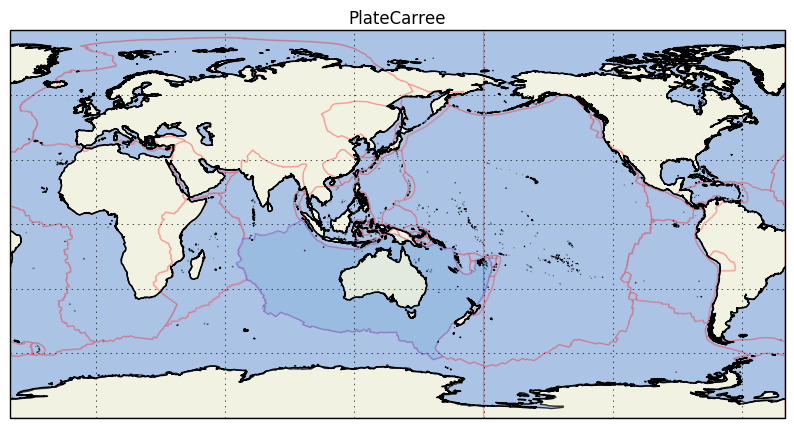

In [81]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m',zorder=3, linewidth=1)
ax.set_global()
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.2

for add in add_s:
    name = (add.attributes['PlateName'])

    if( add.geometry == None):
        pass
    else:
        if( name == 'Australia'):
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='blue',  facecolor='lightblue', alpha = ADD_alpha)        
        else:
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='red',  facecolor='white', alpha = ADD_alpha)
        #end if
    #end if

#end for

plt.title('PlateCarree')
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


NameError: name 'add_shp' is not defined

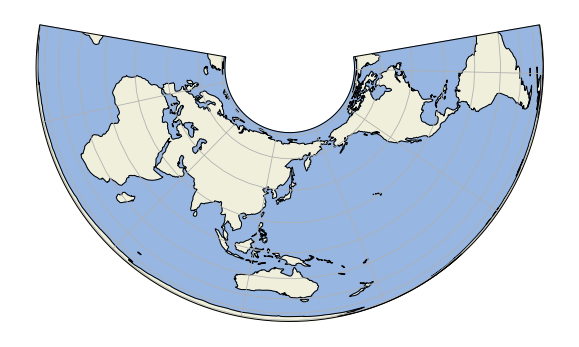

In [4]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:
    name = (add.attributes['PlateName'])
    print(name)

    if( add.geometry == None):
        pass
    else:
        if( name == 'Australia'):
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='blue',  facecolor='white', alpha = ADD_alpha)        
        else:
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='red',  facecolor='lightblue', alpha = ADD_alpha)
        #end if
    #end if

#end for
plt.title('AlbersEqualArea')
plt.show()

Self-intersection at or near point 17657972.403188344 -8187549.7258876227


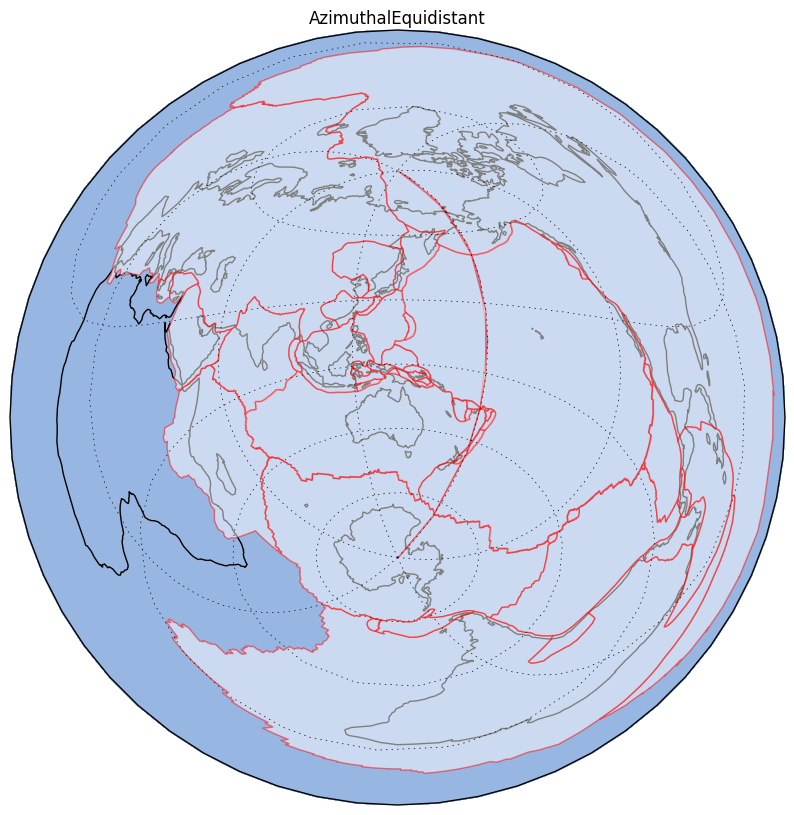

In [65]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(central_longitude=140, central_latitude=-25))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.title('AzimuthalEquidistant')
plt.show()

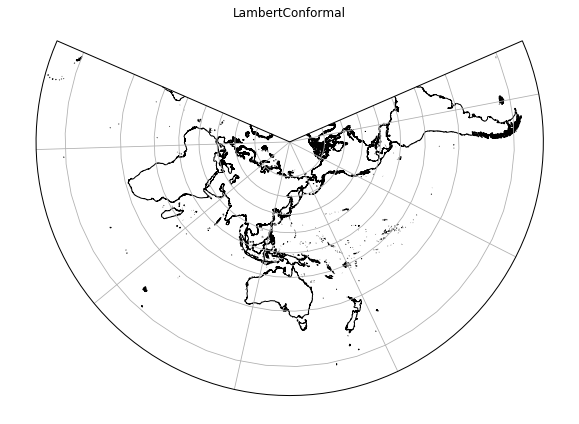

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=140, central_latitude=-25, cutoff = -60))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)
plt.title('LambertConformal')
plt.show()

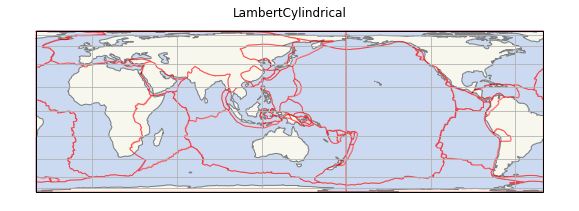

In [7]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.LambertCylindrical(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.title('LambertCylindrical')
plt.show()

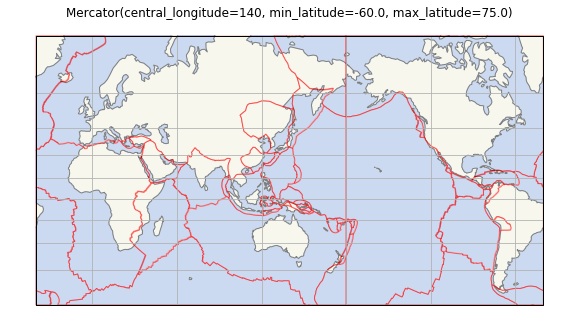

In [8]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=140, min_latitude=-60.0, max_latitude=75.0))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.title('Mercator(central_longitude=140, min_latitude=-60.0, max_latitude=75.0)')
plt.show()

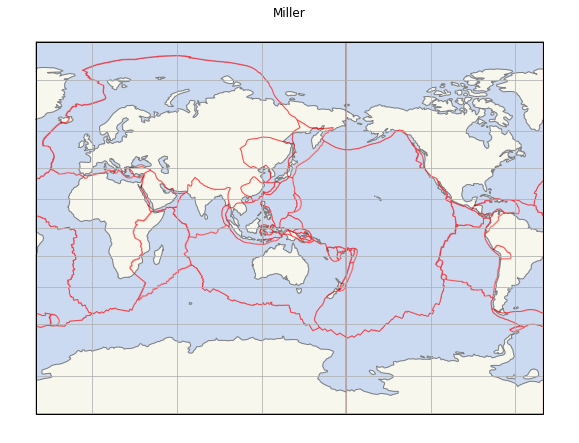

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Miller(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.title('Miller')
plt.show()

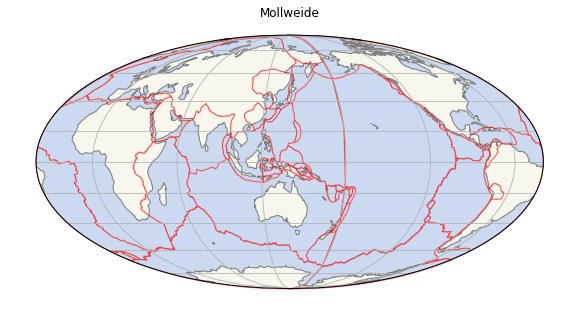

In [10]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.title('Mollweide')
plt.show()

In [11]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine(central_longitude=100))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for

plt.show()

RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

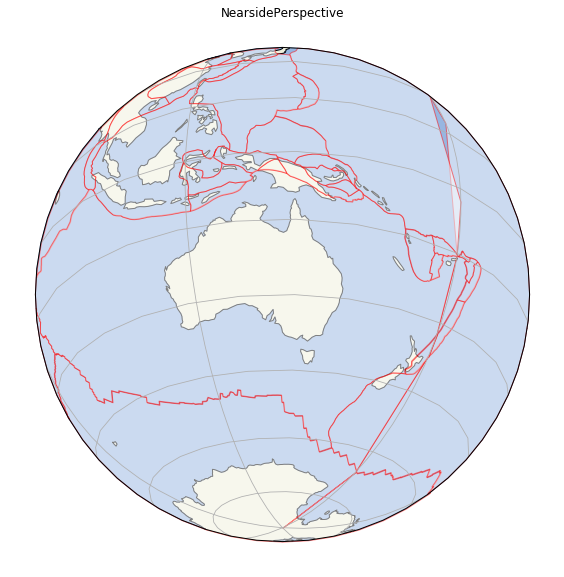

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=140, central_latitude=-30)  )
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.title('NearsidePerspective')
plt.show()

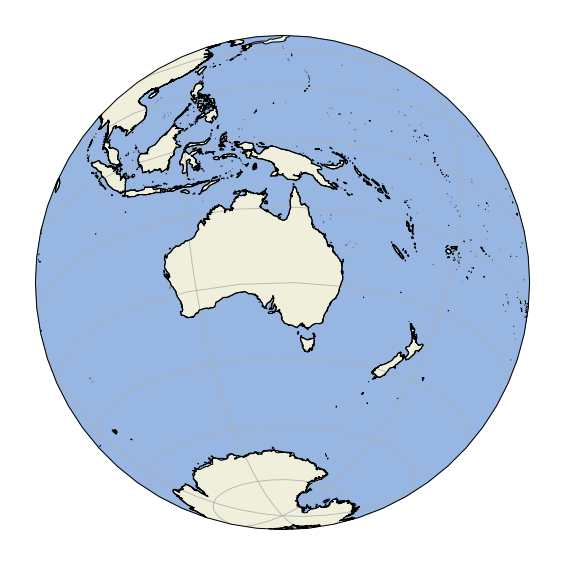

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=140, central_latitude=-30)  )
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m', zorder=3)
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)



plt.show()

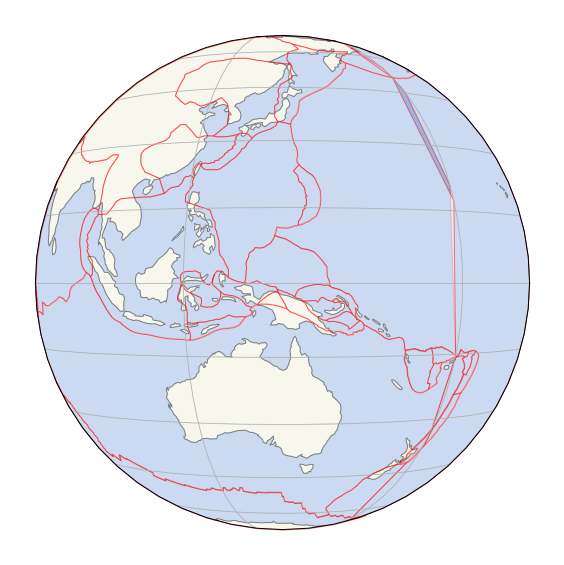

In [15]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.show()

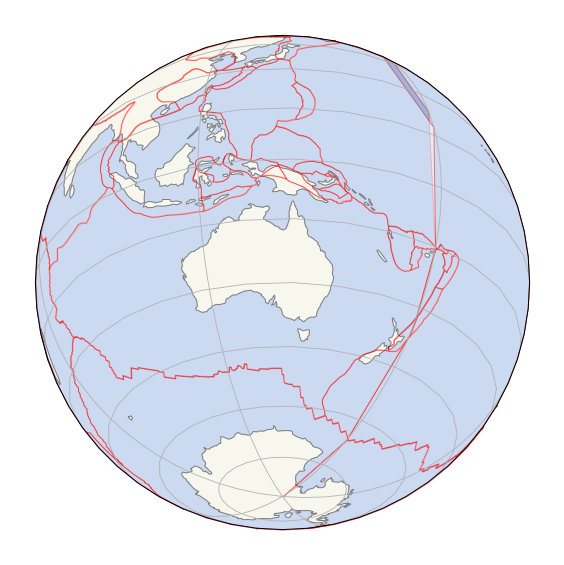

In [16]:

             
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=140, central_latitude=-30))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for
plt.show()

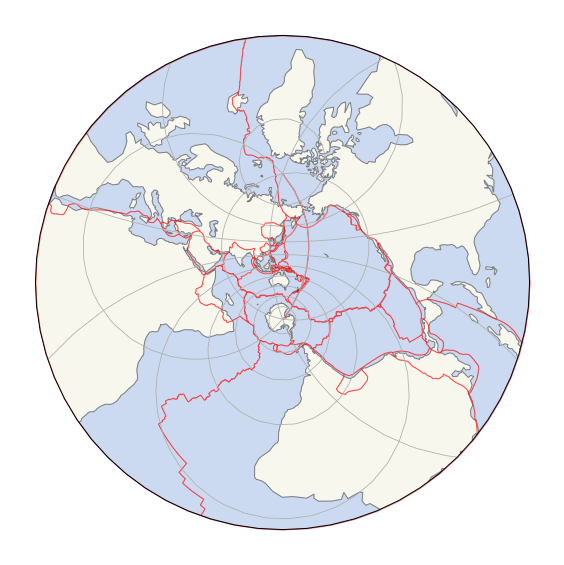

In [17]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude=140, central_latitude=-30))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)


ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/PB2002_plates'
shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.5

for add in add_s:

    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='white', alpha = ADD_alpha)
    #end if

#end for

plt.show()

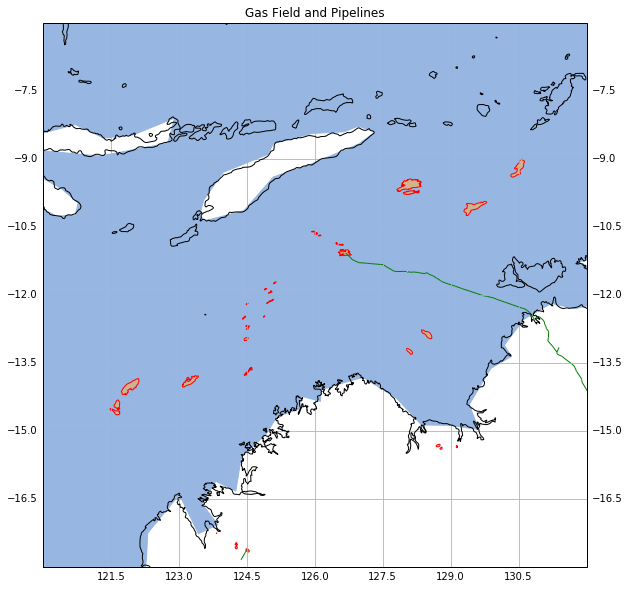

In [22]:
from shapely.geometry import MultiLineString


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.set_extent((120, 132, -18, -6))

ax.coastlines(resolution='10m', zorder=3)

land_feature = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='10m',
        facecolor=cfeature.COLORS['land'])
    
    
# ax.natural_earth_shp(name='land', resolution='10m', category='physical') now depricated
ax.add_feature(land_feature)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top = False

#ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.COASTLINE)

add_shp = '../data/fields'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.99
first=True
for add in add_s:
    if(first):
        #print(add.attributes)
        first = False
    #end if
    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='tan', alpha = ADD_alpha)        
    #end if

#end for

add_shp = '../data/pipelines'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.99
first=True


first = True
for add in add_s:
    if(first):
        #print(add.attributes)
        #print(add.geometry)
        first = False
    #end if
    if( add.geometry == None):
        pass
    else:
        lines = add.geometry
        line_good=[]
        for l in lines:
            start_pt = list(l.coords)[0]
            for i in range(1,len(l.coords)):
                end_pt = list(l.coords)[i]
                simple_line = (start_pt, end_pt)
                line_good.append(simple_line)
                start_pt = end_pt
            #end for
        #end for
        lines = MultiLineString(line_good)
        
        ax.add_geometries([lines], ccrs.PlateCarree(),\
                          edgecolor='green', facecolor=None, alpha = ADD_alpha)    
    #end if
   
#end for
plt.title('Gas Field and Pipelines')
plt.show()



MULTILINESTRING ((0 0, 10 10), (0 20, 10 15, 15 10, 20 0))


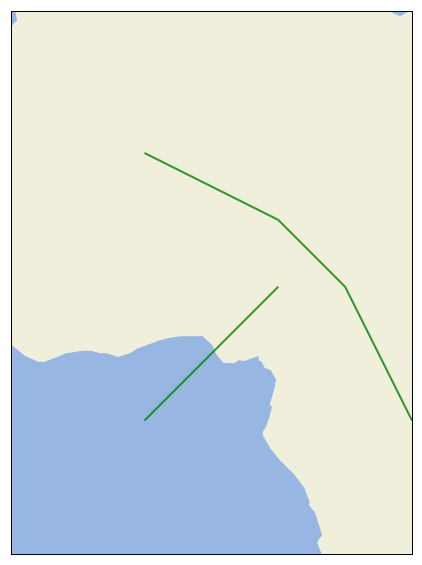

In [19]:
from shapely.geometry import MultiLineString

lines = MultiLineString([((0, 0), (10, 10)), ((0, 20),  (10, 15), (15, 10), (20, 0))])
print(lines)


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140))
ax.set_extent((-10, 20, -10, 30))


ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)



ax.add_geometries([lines], ccrs.PlateCarree(),\
                          edgecolor='green', facecolor='none', alpha = 0.8, linewidth=2)

plt.show()

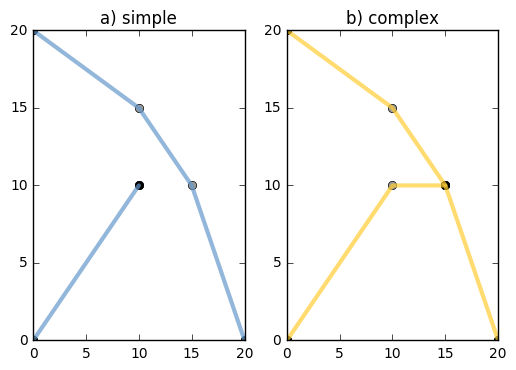

In [20]:
from matplotlib import pyplot
from shapely.geometry import MultiLineString



COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob):
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#999999', zorder=1)

def plot_bounds(ax, ob):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)

def plot_lines(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

fig = pyplot.figure(1,  dpi=90)

# 1: disconnected multilinestring
ax = fig.add_subplot(121)

mline1 = MultiLineString([((0, 0), (10, 10)), ((0, 20),  (10, 15), (15, 10), (20, 0))])

plot_coords(ax, mline1)
plot_bounds(ax, mline1)
plot_lines(ax, mline1)

ax.set_title('a) simple')



#2: invalid self-touching ring
ax = fig.add_subplot(122)

mline2 = MultiLineString([((0, 0), (10, 10), (15, 10)), ((0, 20), (10, 15), (15, 10), (20, 0))])

plot_coords(ax, mline2)
plot_bounds(ax, mline2)
plot_lines(ax, mline2)

ax.set_title('b) complex')



pyplot.show()


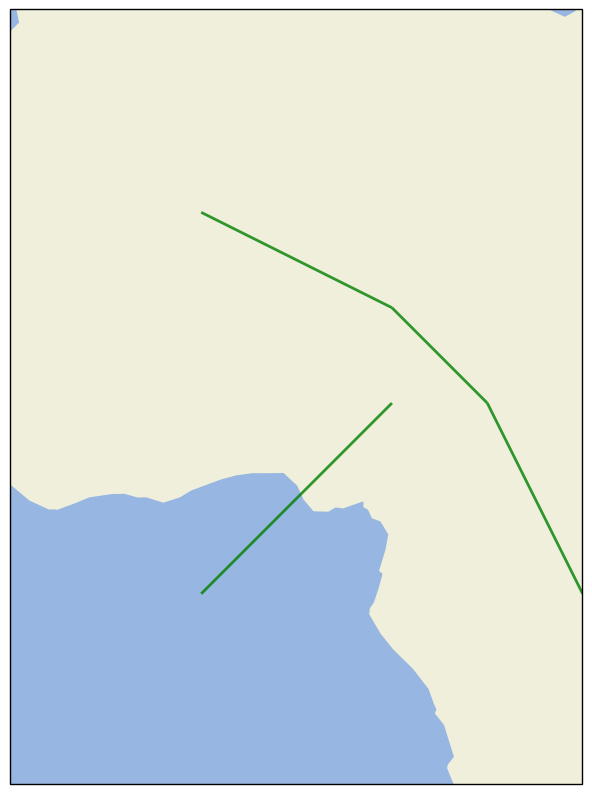

In [6]:
from shapely.geometry import MultiLineString

lines = MultiLineString([((0, 0), (10, 10)), ((0, 20),  (10, 15), (15, 10), (20, 0))])

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140))
ax.set_extent((-10, 20, -10, 30))

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)

# turn multipoint lines into simple start-end lines
line_good=[]
for l in lines:
    start_pt = list(l.coords)[0]
    for i in range(1,len(l.coords)):
        end_pt = list(l.coords)[i]
        simple_line = (start_pt, end_pt)
        line_good.append(simple_line)
        start_pt = end_pt
    #end for
#end for

lines = MultiLineString(line_good)
for l in lines:
    ax.add_geometries([l], ccrs.PlateCarree(),\
                              edgecolor='green', facecolor=None, alpha = 0.8, linewidth=2)
#end for

plt.show()

In [23]:
BORDERS_10m = cartopy.feature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land',
                              '10m', edgecolor='black', facecolor='none')
"""country boundaries."""


COASTLINE_10m = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m',
                                edgecolor='black', facecolor='none')
"""coastline, including major islands."""


LAKES_10m = cartopy.feature.NaturalEarthFeature('physical', 'lakes', '10m',
                            edgecolor='face',
                            facecolor=cartopy.feature.COLORS['water'])
""" natural and artificial lakes."""


LAND_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                           edgecolor='face',
                           facecolor=cartopy.feature.COLORS['land'])
"""land polygons, including major islands."""


OCEAN_10m = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '10m',
                            edgecolor='face',
                            facecolor=cartopy.feature.COLORS['water'])
"""Small scale (1:110m) ocean polygons."""


RIVERS_10m = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                             edgecolor=cartopy.feature.COLORS['water'],
                             facecolor='none')
"""single-line drainages, including lake centerlines."""


'single-line drainages, including lake centerlines.'

Adding gas fields ...
Adding pipelines ...


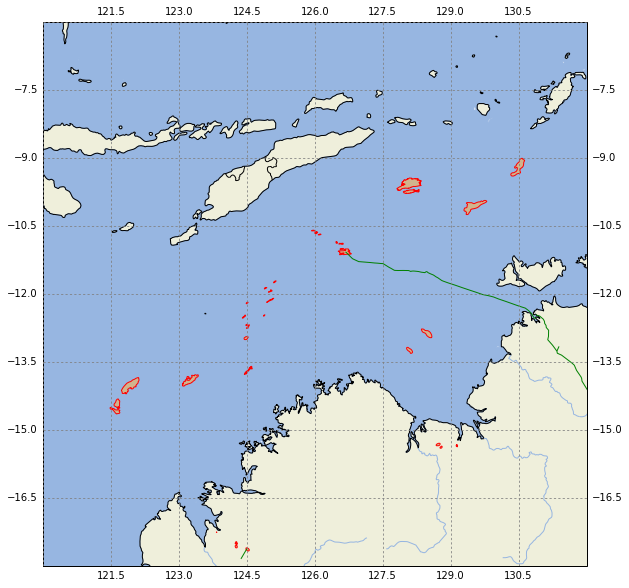

In [32]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))  # whole of Australia
ax.set_extent((120, 132, -18, -6))   # NE Australia to E Timor

#ax.coastlines(resolution='10m', zorder=3)
#ax.natural_earth_shp(name='land', resolution='10m', category='physical')
ax.gridlines(draw_labels=True, zorder=4, edgecolor='gray',  linestyle='dotted')

ax.add_feature(LAND_10m)
ax.add_feature(OCEAN_10m)
ax.add_feature(COASTLINE_10m)
ax.add_feature(RIVERS_10m )
ax.add_feature(BORDERS_10m )

print('Adding gas fields ...')
add_shp = '../data/fields'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.99
first=True
for add in add_s:
    if(first):
        #print(add.attributes)
        first = False
    #end if
    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='tan', alpha = ADD_alpha)        
    #end if

#end for

print('Adding pipelines ...')
add_shp = '../data/pipelines'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.99
first=True


first = True
for add in add_s:
    if(first):
        #print(add.attributes)
        #print(add.geometry)
        first = False
    #end if
    if( add.geometry == None):
        pass
    else:
        lines = add.geometry

        ax.add_geometries([lines], ccrs.PlateCarree(),\
                          edgecolor='green', facecolor='none', alpha = ADD_alpha)    
    #end if
#end for   


plt.show()



{'namealt': b'                                                                                                                                                                                                                                                              ', 'note': b'                                                                                                                                                                                                                                                              ', 'ls_match': 0, 'adm0name': 'Uruguay', 'capalt': 0.0, 'ls_name': b'                                         ', 'nameascii': 'Colonia del Sacramento', 'diffascii': 0, 'sov_a3': 'URY', 'labelrank': 8, 'adm1name': 'Colonia', 'longitude': -57.8400024734, 'namepar': b'                                                                                                                                                                                                       

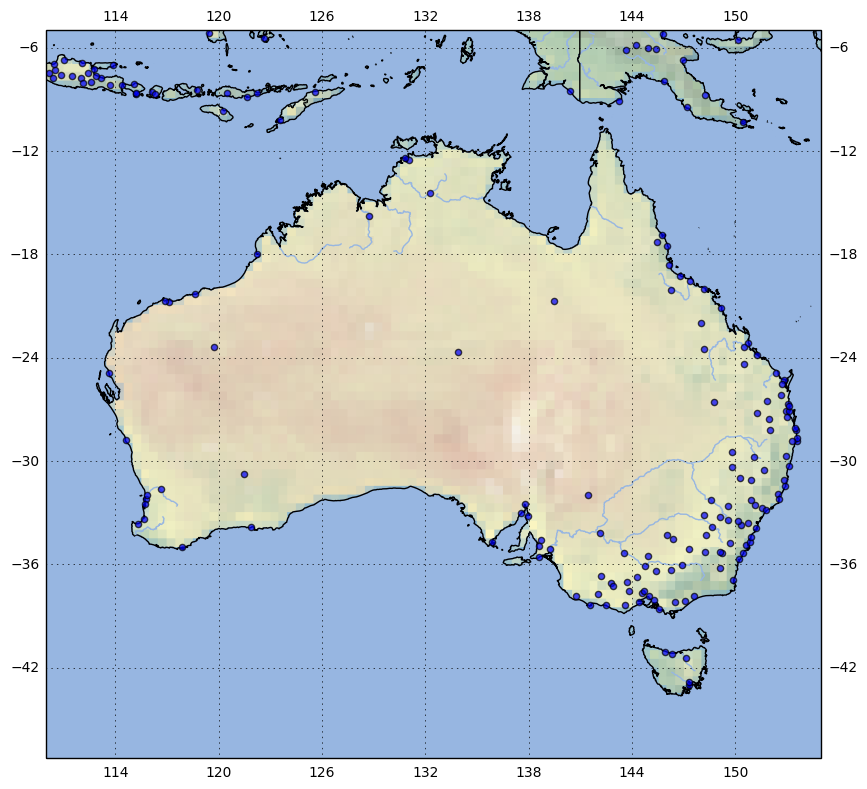

In [62]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=140))
ax.set_extent((110, 155, -45, -5))  # whole of Australia


#ax.coastlines(resolution='10m', zorder=3)
#ax.natural_earth_shp(name='land', resolution='10m', category='physical')
ax.gridlines(draw_labels=True)

#ax.add_feature(LAND_10m)
ax.add_feature(OCEAN_10m)
ax.add_feature(COASTLINE_10m)
ax.add_feature(RIVERS_10m )
ax.add_feature(BORDERS_10m )
ax.stock_img()


fname = cartopy.io.shapereader.natural_earth(resolution='10m',
                                               category='cultural',
                                               name='populated_places_simple')


points = list(cartopy.io.shapereader.Reader(fname).geometries())

add = shapereader.Reader(fname)
add_s = add.records()
xs = []
ys = []
first = True
for add in add_s:
    if(first):
        print(add.attributes)
        #print(add.geometry)
        first=False
    #end if
    if( add.geometry == None):
        pass
    else:
        if( add.attributes['pop_max']>5000):
            xs.append(add.geometry.x)
            ys.append(add.geometry.y)
            if((add.geometry.x>110) and
               (add.geometry.x<150) and
               (add.geometry.y>-45) and
               (add.geometry.y<-12)     ):
                pass
#                txt = plt.text(add.geometry.x, add.geometry.y, add.attributes['nameascii'], fontsize=10,\
#                       color='black', transform=ccrs.Geodetic(), zorder=2)
            #end if
              
#end for
marker = 'o'
a = ax.scatter(xs,ys,marker=marker, zorder = 2,  \
               transform=ccrs.Geodetic(), alpha=0.7)

plt.show()

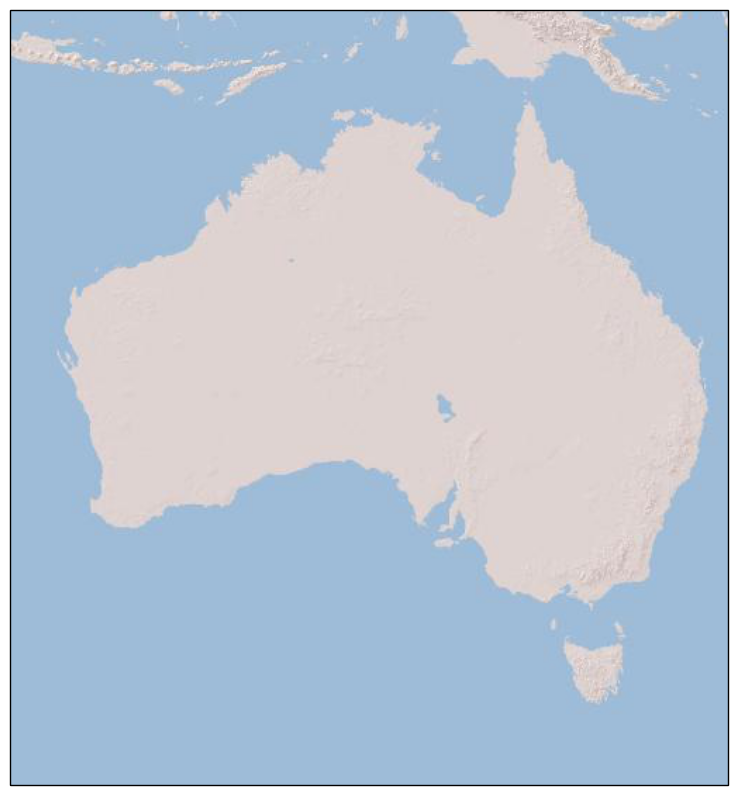

In [75]:
from cartopy.io.img_tiles import GoogleTiles
class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(
               z=z, y=y, x=x)
        return url


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ShadedReliefESRI().crs)
ax.set_extent((110, 155, -45, -5))  # whole of Australia
zoom = 4
ax.add_image(ShadedReliefESRI(), zoom)
plt.show()

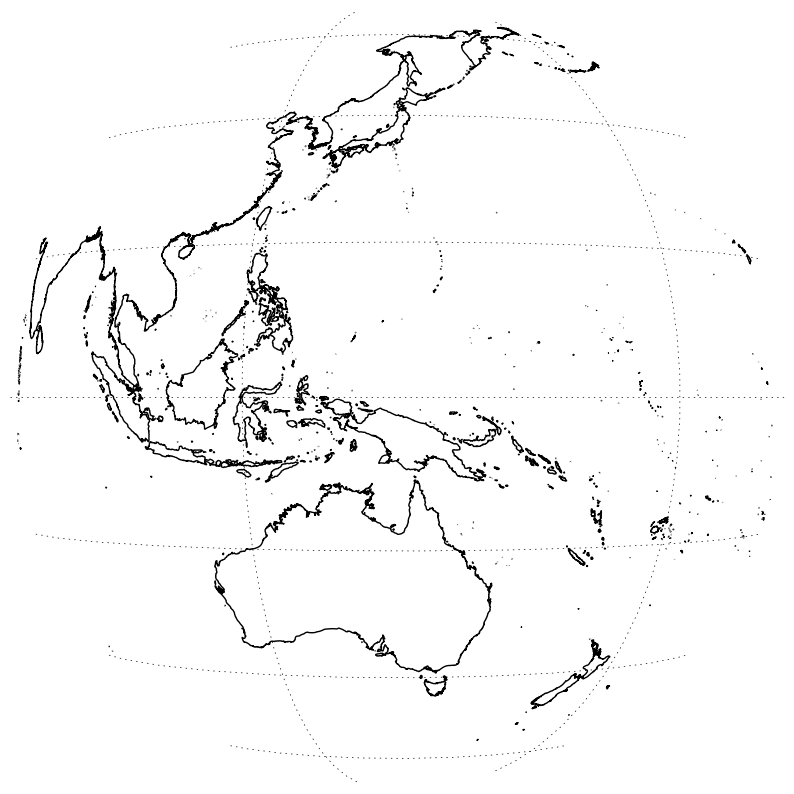

In [87]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=140))
#ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=False)

#ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.COASTLINE)
ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)


plt.show()